# 气象数据模拟与降雨预测  
## 任务目标  
1. 模拟生成2年的气象数据（日期、温度、湿度、气压）  
2. 使用Prophet或ARIMA模型预测未来7天降雨量  
3. 可视化历史数据和预测结果

In [1]:
# 导入所需库
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

In [2]:
# 生成模拟数据
start_date = datetime(2021, 1, 1)
end_date = datetime(2022, 12, 31)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# 模拟温度（摄氏度）、湿度（百分比）、气压（hPa）
temperature = np.random.normal(loc=20, scale=5, size=len(dates))
humidity = np.random.normal(loc=60, scale=10, size=len(dates))
pressure = np.random.normal(loc=1013, scale=5, size=len(dates))

# 创建DataFrame
data = pd.DataFrame({
    'date': dates,
    'temperature': temperature,
    'humidity': humidity,
    'pressure': pressure
})

# 显示前5行
data.head()

,date,temperature,humidity,pressure
0,2021-01-01,22.483571,61.958453,1012.307720
1,2021-01-02,19.308678,50.216272,1006.878509
2,2021-01-03,23.238443,64.082528,1011.954884
3,2021-01-04,27.615149,42.974164,1008.747398
4,2021-01-05,18.829233,70.291556,1010.097383


## 数据预览  
以下是模拟生成的气象数据前5行：

<Figure size 1008x576 with 3 Axes>
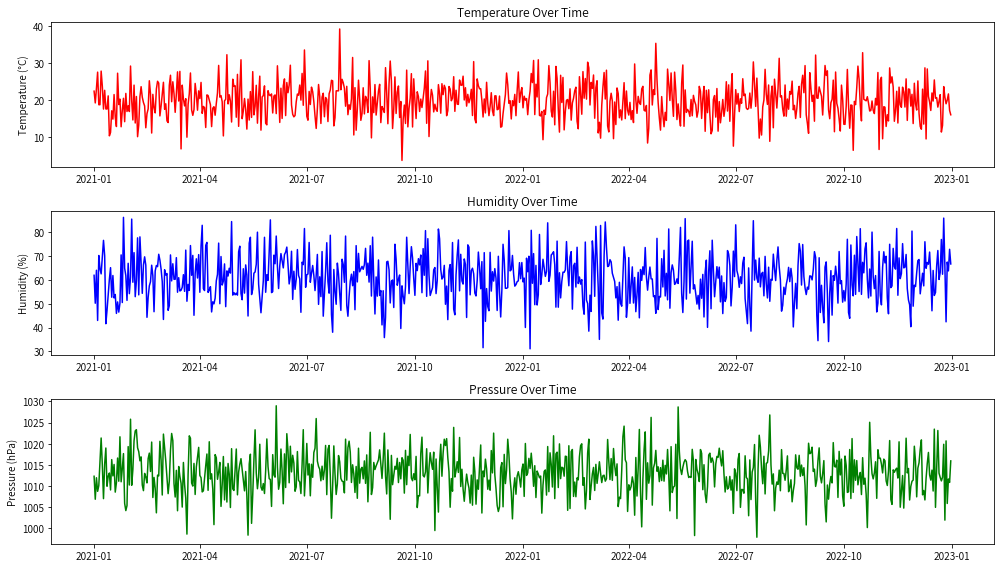

In [3]:
# 可视化历史数据
plt.figure(figsize=(14, 8))

# 温度
plt.subplot(3, 1, 1)
plt.plot(data['date'], data['temperature'], color='red')
plt.title('Temperature Over Time')
plt.ylabel('Temperature (°C)')

# 湿度
plt.subplot(3, 1, 2)
plt.plot(data['date'], data['humidity'], color='blue')
plt.title('Humidity Over Time')
plt.ylabel('Humidity (%)')

# 气压
plt.subplot(3, 1, 3)
plt.plot(data['date'], data['pressure'], color='green')
plt.title('Pressure Over Time')
plt.ylabel('Pressure (hPa)')

plt.tight_layout()
plt.show()

## 降雨预测模型  
接下来，我们将使用Prophet模型预测未来7天的降雨量。

In [4]:
# 安装Prophet
!pip install prophet -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 14.4 MB 1.6 MB/s            
     |████████████████████████████████| 1.0 MB 2.1 MB/s            
     |████████████████████████████████| 94 kB 2.5 MB/s              


In [5]:
from prophet import Prophet

# 模拟降雨量（假设降雨量与湿度和气压相关）
data['rainfall'] = (data['humidity'] * 0.1) + (data['pressure'] * 0.01) + np.random.normal(loc=0, scale=1, size=len(dates))

# 准备Prophet输入数据
df = data[['date', 'rainfall']].rename(columns={'date': 'ds', 'rainfall': 'y'})

# 初始化并拟合模型
model = Prophet()
model.fit(df)

07:49:06 - cmdstanpy - INFO - Chain [1] start processing
07:49:06 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# 创建未来7天的预测数据
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# 显示预测结果
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
730,2023-01-01,16.344797,14.511881,18.124796
731,2023-01-02,15.950462,14.199223,17.791946
732,2023-01-03,16.339257,14.540280,18.153764
733,2023-01-04,16.403441,14.683899,18.333300
734,2023-01-05,15.995929,14.164461,17.874318
735,2023-01-06,16.040980,14.228217,17.888552
736,2023-01-07,16.456361,14.609210,18.233682


## 预测结果可视化  
以下是历史数据和未来7天降雨量的预测结果：

<Figure size 720x432 with 1 Axes>
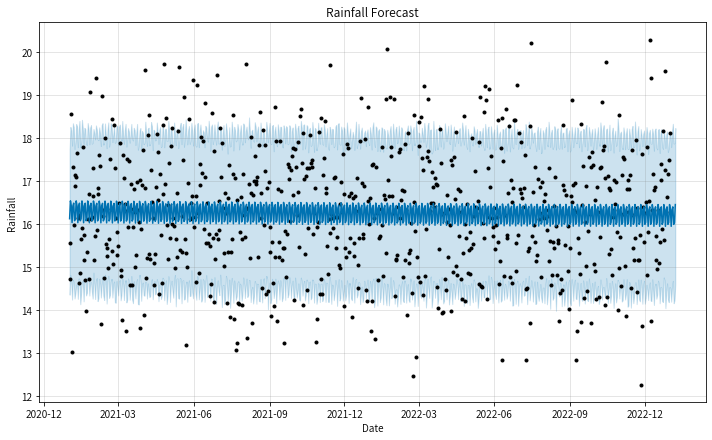

In [7]:
# 绘制预测结果
fig = model.plot(forecast)
plt.title('Rainfall Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()